# Smoothing the solar model variables

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.interpolate import interp1d
import pandas as pd

plt.style.use('style_prof2.mplstyle')

In [2]:
names = ['m','r','T','rho','P','l','X_H','X_He4','X_He3','X_C12','X_N14','X_N16','log10(n_eN_A)','X_7Be','nu pp','nu B8','nu N13','nu O15','nu F17','nu Be7','nu pep','nu hep']

df_rough_model = pd.read_csv('rough_model.csv',names=names, skiprows=1,index_col=False)

In [3]:
df_rough_model

,m,r,T,rho,P,l,X_H,X_He4,X_He3,X_C12,...,log10(n_eN_A),X_7Be,nu pp,nu B8,nu N13,nu O15,nu F17,nu Be7,nu pep,nu hep
0,4.000000e-07,0.00161,15500000,151.000000,2.340000e+17,0.00001,0.36462,0.62029,0.000009,0.000008,...,2.011,1.580000e-11,2.840000e-06,3.460000e-05,2.060000e-05,2.850000e-05,3.160000e-05,1.390000e-05,4.420000e-06,1.220000e-06
1,5.000000e-07,0.00172,15500000,151.000000,2.340000e+17,0.00001,0.36462,0.62028,0.000009,0.000008,...,2.011,1.580000e-11,3.190000e-06,3.890000e-05,2.310000e-05,3.210000e-05,3.550000e-05,1.570000e-05,4.980000e-06,1.370000e-06
2,6.000000e-07,0.00182,15500000,151.000000,2.340000e+17,0.00001,0.36463,0.62027,0.000009,0.000008,...,2.011,1.580000e-11,3.540000e-06,4.310000e-05,2.570000e-05,3.560000e-05,3.940000e-05,1.740000e-05,5.520000e-06,1.520000e-06
3,7.000000e-07,0.00191,15500000,151.000000,2.340000e+17,0.00001,0.36464,0.62026,0.000009,0.000008,...,2.011,1.580000e-11,3.850000e-06,4.700000e-05,2.790000e-05,3.880000e-05,4.290000e-05,1.890000e-05,6.020000e-06,1.650000e-06
4,9.000000e-07,0.00200,15500000,150.000000,2.340000e+17,0.00001,0.36464,0.62025,0.000009,0.000008,...,2.011,1.580000e-11,4.170000e-06,5.080000e-05,3.020000e-05,4.190000e-05,4.640000e-05,2.040000e-05,6.510000e-06,1.790000e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,9.999879e-01,0.98220,86000,0.001050,1.140000e+10,0.99891,0.75830,0.22905,0.000101,0.002180,...,0.000,1.070000e-23,6.670000e-08,2.290000e-19,2.900000e-15,2.670000e-21,6.370000e-19,1.440000e-16,2.010000e-09,3.410000e-10
1280,9.999885e-01,0.98249,84400,0.001010,1.080000e+10,0.99891,0.75830,0.22905,0.000101,0.002180,...,0.000,1.070000e-23,6.670000e-08,2.290000e-19,2.900000e-15,2.670000e-21,6.370000e-19,1.440000e-16,2.010000e-09,3.410000e-10
1281,9.999888e-01,0.98261,83700,0.001000,1.060000e+10,0.99891,0.75830,0.22905,0.000101,0.002180,...,0.000,1.070000e-23,6.670000e-08,2.290000e-19,2.900000e-15,2.670000e-21,6.370000e-19,1.440000e-16,2.010000e-09,3.410000e-10
1282,9.999892e-01,0.98280,82700,0.000978,1.020000e+10,0.99891,0.75830,0.22905,0.000101,0.002180,...,0.000,1.070000e-23,6.670000e-08,2.290000e-19,2.900000e-15,2.670000e-21,6.370000e-19,1.440000e-16,2.010000e-09,3.410000e-10


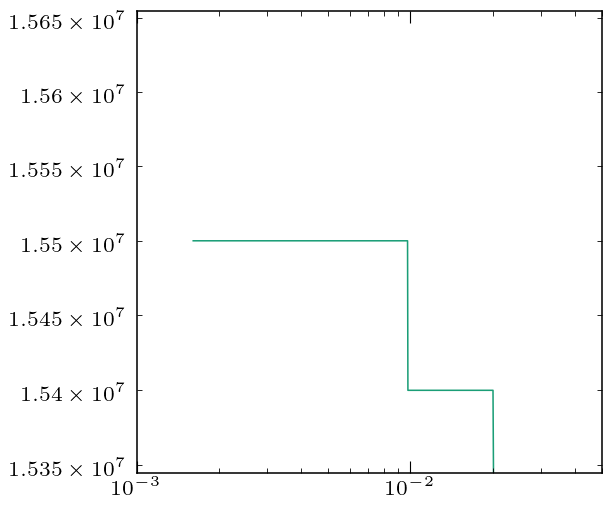

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3),dpi=200)
r = np.array(df_rough_model['r'])
quantity = np.array(df_rough_model['T'])
ax.plot(r,quantity)
ax.set_xscale('log')
ax.set_yscale('log')
zoom_y = quantity[0]
tol = 0.01
ax.set_ylim(zoom_y - tol*zoom_y, zoom_y + tol*zoom_y)
ax.set_xlim(1e-3,5e-2)
plt.show()

In [5]:
r_fine = np.linspace(min(r),max(r),2000)

In [6]:
from scipy.interpolate import splrep, splev
from scipy.interpolate import UnivariateSpline

In [ ]:
df_smooth = pd.DataFrame({'r':r_fine})
#print(len(df_rough_model['r']))
#print(len(df_rough_model['m']))

exclude_log = ['l','X_H','X_He4','log10(n_e/N_A)','nu pp','nu B8','nu N13','nu O15','nu F17','nu Be7','nu pep','nu hep']

for col in df_rough_model.columns:
    if col != 'r':
        if col not in exclude_log:
            print(col)
            spline_guy = UnivariateSpline(df_rough_model['r'], np.log10(df_rough_model[col]),s=1/800,k=5,ext=3)
            df_smooth[col] = 10**spline_guy(r_fine)

        if col in exclude_log:
            print(col)
            spline_guy = UnivariateSpline(df_rough_model['r'], df_rough_model[col],s=1/800,k=5,ext=3)
            df_smooth[col] = spline_guy(r_fine)

In [8]:
df_smooth

,r,m,T,rho,P,l,X_H,X_He4,X_He3,X_C12,...,log10(n_eN_A),X_7Be,nu pp,nu B8,nu N13,nu O15,nu F17,nu Be7,nu pep,nu hep
0,0.001610,4.000815e-07,1.551290e+07,150.271826,2.340777e+17,0.000909,0.365852,0.620014,0.000009,0.000008,...,NaN,1.583862e-11,-0.000283,0.000230,0.000562,0.000362,0.000316,0.000325,-0.000202,-0.000335
1,0.002101,1.035930e-06,1.551093e+07,150.253896,2.340035e+17,0.000831,0.365738,0.619973,0.000009,0.000008,...,NaN,1.581484e-11,-0.000254,0.000320,0.000585,0.000429,0.000393,0.000356,-0.000171,-0.000311
2,0.002592,1.842258e-06,1.550882e+07,150.231998,2.339318e+17,0.000755,0.365647,0.619922,0.000009,0.000008,...,NaN,1.579389e-11,-0.000225,0.000410,0.000608,0.000494,0.000469,0.000385,-0.000139,-0.000286
3,0.003083,3.113775e-06,1.550658e+07,150.206033,2.338609e+17,0.000683,0.365578,0.619858,0.000009,0.000008,...,NaN,1.577528e-11,-0.000196,0.000497,0.000630,0.000559,0.000543,0.000415,-0.000108,-0.000262
4,0.003574,4.889212e-06,1.550421e+07,150.175903,2.337895e+17,0.000615,0.365531,0.619783,0.000009,0.000008,...,NaN,1.575851e-11,-0.000167,0.000583,0.000653,0.000622,0.000617,0.000444,-0.000078,-0.000239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.981116,1.000295e+00,9.209170e+04,0.001185,1.379013e+10,0.998610,0.758447,0.228577,0.000101,0.002180,...,NaN,1.069990e-23,0.000364,0.000307,0.000512,0.000509,0.000420,0.000771,0.000501,0.000142
1996,0.981607,1.000315e+00,8.969715e+04,0.001125,1.267915e+10,0.998592,0.758471,0.228495,0.000101,0.002180,...,NaN,1.069989e-23,0.000373,0.000314,0.000525,0.000521,0.000430,0.000790,0.000514,0.000146
1997,0.982098,1.000335e+00,8.732505e+04,0.001066,1.163155e+10,0.998574,0.758497,0.228409,0.000101,0.002179,...,NaN,1.069989e-23,0.000383,0.000321,0.000537,0.000533,0.000439,0.000809,0.000527,0.000151
1998,0.982589,1.000356e+00,8.497603e+04,0.001008,1.064577e+10,0.998555,0.758524,0.228319,0.000101,0.002179,...,NaN,1.069988e-23,0.000392,0.000328,0.000550,0.000545,0.000449,0.000828,0.000540,0.000155


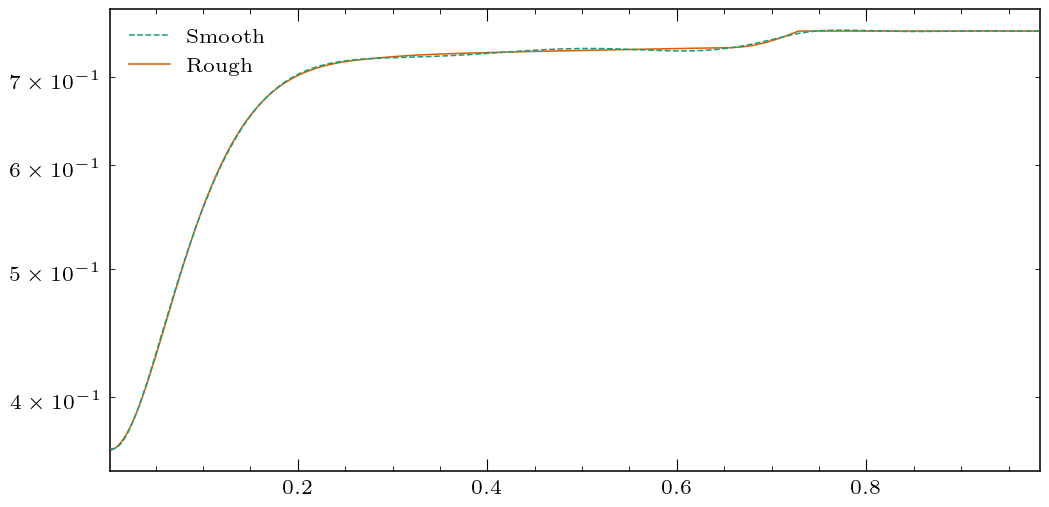

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3),dpi=200)
r = np.array(r_fine)
thing = 'X_H'
quantity = np.array(df_smooth[thing])
ax.plot(r,quantity,label='Smooth',zorder=5,ls='dashed')
#ax.set_xscale('log')
ax.set_yscale('log')

r = np.array(df_rough_model['r'])
quantity = np.array(df_rough_model[thing])
ax.plot(r,quantity,label='Rough')

zoom_y = quantity[0]
tol = 0.01
#ax.set_ylim(zoom_y - tol*zoom_y, zoom_y + tol*zoom_y)
#ax.set_xlim(1e-3,5e-2)
ax.legend()
plt.show()

In [12]:
def smooth_and_plot(df, column_name, smoothing_factor,order,logged):
    if column_name not in df.columns:
        print(f"Column {column_name} not found in the DataFrame.")
        return
    
    r = df['r']
    y = df[column_name]

    # Define a fine grid for 'r'
    r_fine = np.linspace(r.min(), r.max(), 1000)

    if logged == True:
        spline = UnivariateSpline(r, np.log10(y), s=smoothing_factor,k=order)
        y_smooth = 10**spline(r_fine)
    else:
        # Perform spline interpolation
        spline = UnivariateSpline(r, y, s=smoothing_factor,k=order)
        y_smooth = spline(r_fine)

    # Plotting the results to visualize
    plt.figure(figsize=(6, 3),dpi=200)

    rough_geometry_factor = r**2 #default is 1
    smooth_geometry_factor = r_fine**2 #default is 1
    
    plt.plot(r, y * rough_geometry_factor, label=f'Original {column_name}',lw=3)
    plt.plot(r_fine, y_smooth * smooth_geometry_factor, label=f'Smoothed {column_name} (s={smoothing_factor})',zorder=5,lw=0.5)
    plt.legend()
    plt.xlabel('r')
    plt.xlim(0,0.2)
    #plt.ylim(1.4e-11,1.6e-11)
    #plt.xscale('log')
    #plt.yscale('log')
    plt.ylabel('Values')
    plt.title(f'Spline Interpolation for {column_name} with Smoothing Factor {smoothing_factor}')
    plt.show()
    smoothed_df = pd.DataFrame({'r': r_fine, column_name: y_smooth})
    smoothed_df.to_csv('{}.csv'.format(column_name), index=False)

'm','r','T','rho','P','l','X_H','X_He4','X_He3','X_C12','X_N14','X_N16','log10(n_e/N_A)','X_7Be','nu pp','nu B8','nu N13','nu O15','nu F17','nu Be7','nu pep','nu hep'

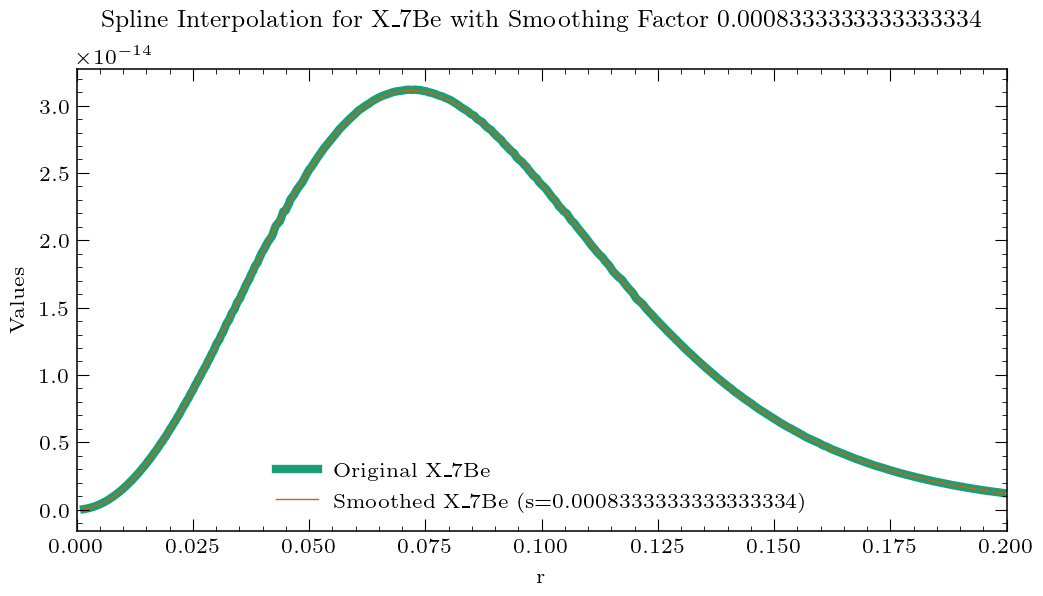

In [13]:
column_to_smooth = 'X_7Be'  # Change this to the column you want to smooth
logged = True
smoothing_factor = 1/1200  # Adjust this value as needed
order = 3

smooth_and_plot(df_rough_model, column_to_smooth, smoothing_factor,order,logged)